# Homework 3 Neural Networks

## Load data

In [1115]:
# Load the mat file
from os.path import dirname, join as pjoin
import scipy.io as sio
from numpy import linalg as LA
import warnings

warnings.filterwarnings('ignore')

path_to_mat = '/Users/crystalshin/Documents/GitHub/COMS4771/nn_data.mat'

mat_contents = sio.loadmat(path_to_mat)

sorted(mat_contents.keys())

['X1', 'X2', 'Y1', 'Y2', '__globals__', '__header__', '__version__']

## Initial visualizations

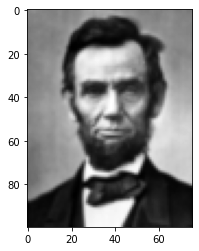

In [1116]:
# Visualize original greyscale images
import matplotlib.pyplot as plt
import numpy as np

height = int(np.max(mat_contents['X1'][:,0]))
width = int(np.max(mat_contents['X1'][:,1]))
image = np.zeros((height, width))

for i, each in enumerate(mat_contents['X1']):
    x_loc = int(each[0])
    y_loc = int(each[1])
    image[x_loc-1, y_loc-1] = mat_contents['Y1'][i]

plt.imshow(image, cmap = 'gray')

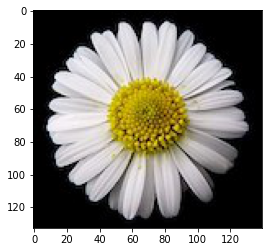

In [1117]:
# Visualize original RGB images
import matplotlib.pyplot as plt
import numpy as np

height = int(np.max(mat_contents['X2'][:,0]))
width = int(np.max(mat_contents['X2'][:,1]))
image = np.zeros((height, width, 3))

for i, each in enumerate(mat_contents['X2']):
    x_loc = int(each[0])
    y_loc = int(each[1])
    for j, chan in enumerate(mat_contents['Y2'][i]):
        image[x_loc-1, y_loc-1, j] = int(chan)

plt.imshow(image.astype(np.uint8))

## Prepare input data

In [1118]:
input_lincoln = mat_contents['X1'].transpose()
output_lincoln = (mat_contents['Y1']).transpose()/255
input_flower = mat_contents['X2'].transpose()
output_flower = (mat_contents['Y2']).transpose()/255

In [1119]:
# Sigmoid method
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [1120]:
def train(X, y, isRGB, batch_size):
    if isRGB:
        # Initialize weight vector and bias
        w_1 = np.random.rand(2,3) # 2x4
        b_1 = np.random.rand(3,1)

        w_2 = np.random.rand(3,3) # 4x4
        b_2 = np.random.rand(3,1)

        w_3 = np.random.rand(3,3) # 4x1
        b_3 = np.random.rand(3,1)
    else:
        # Initialize weight vector and bias
        w_1 = np.random.rand(2,3) # 2x4
        b_1 = np.random.rand(3,1)

        w_2 = np.random.rand(3,3) # 4x4
        b_2 = np.random.rand(3,1)

        w_3 = np.random.rand(3,1) # 4x1
        b_3 = np.random.rand(1,1)

    # Define the learning rate
    lr = 1
    
    preds = []
    losses = []
    num_iter = int(y.shape[1]/batch_size)
    for i in range(num_iter):
        # Create subset
        X_subset = X[:,i*batch_size:i*batch_size+batch_size]
        y_subset = y[:,i*batch_size:i*batch_size+batch_size]

        # Forward pass
        # 1st layer with k=4 (w=2x4, x=7600x2, y=7600x4)
        y_bar_1 = np.dot(w_1.transpose(),X_subset)+b_1
        y_hat_1 = sigmoid(y_bar_1)

        # 2nd layer with k=8 (w=4x8, x=7600x4, y=7600x4)
        y_bar_2 = np.dot(w_2.transpose(),y_hat_1)+b_2
        y_hat_2 = sigmoid(y_bar_2)

        # 3rd layer with k=8 (w=8x1, x=7600x8, y=7600x1)
        y_bar_3 = np.dot(w_3.transpose(),y_hat_2)+b_3
        y_hat_3 = sigmoid(y_bar_3)
        preds.append(np.array(y_hat_3).transpose())
        
        # Calculate loss
        loss = np.power(y_hat_3 - y_subset, 2).sum()/y_subset.shape[1]
        losses.append(loss)
        
        # Back prop
        # Layer 3
        mse = (y_hat_3-y_subset)/y_subset.shape[1] # 1x3
        sigmoid_derivative = (sigmoid(y_bar_3)*(1-sigmoid(y_bar_3))) # 1x3
        gradient = np.multiply(mse, sigmoid_derivative) # 1x3
        d_w3 = np.dot(y_hat_2, gradient.transpose())
        d_b3 = gradient.sum(axis=1, keepdims=True)
        
        # Layer 2
        sigmoid_derivative_2 = sigmoid(y_bar_2)*(1-sigmoid(y_bar_2))
        gradient2 = np.multiply(np.dot(w_3, gradient), sigmoid_derivative_2)
        d_w2 = np.dot(y_hat_1, gradient2.transpose())
        d_b2 = gradient2.sum(axis=1, keepdims=True)

        # Layer 1
        sigmoid_derivative_3 = sigmoid(y_bar_1)*(1-sigmoid(y_bar_1))
        gradient3 = np.multiply(np.dot(w_2, gradient2), sigmoid_derivative_3)
        d_w1 = np.dot(X_subset, gradient3.transpose())
        d_b1 = gradient3.sum(axis=1, keepdims=True)

        # Update weights and biases
        w_3 -= lr*d_w3
        w_2 -= lr*d_w2
        w_1 -= lr*d_w1
        
        b_3 -= lr*d_b3
        if isRGB:
            b_3 -= np.multiply(lr,d_b3)
        b_2 -= lr*d_b2
        b_1 -= lr*d_b1
    
    return preds, losses

In [1121]:
preds1, losses1 = train(input_lincoln, output_lincoln, isRGB=False, batch_size=5)
preds1 = np.array(preds1).reshape(7600,1).flatten()

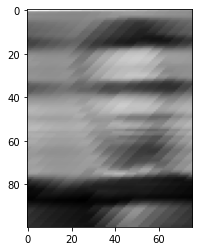

In [1122]:
import matplotlib.pyplot as plt
import numpy as np

height = int(np.max(mat_contents['X1'][:,0]))
width = int(np.max(mat_contents['X1'][:,1]))
image = np.zeros((height, width))

for i, each in enumerate(mat_contents['X1']):
    x_loc = int(each[0])
    y_loc = int(each[1])
    image[x_loc-1, y_loc-1] = preds1.transpose()[i]*255
    
plt.imshow(image, cmap = 'gray')

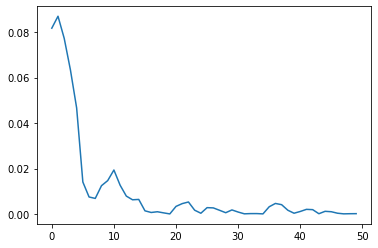

In [1123]:
plt.plot(losses1[0:50])

In [1124]:
preds2, losses2 = train(input_flower, output_flower, isRGB=True, batch_size=5)
preds2 = np.array(preds2).reshape(18620,3)

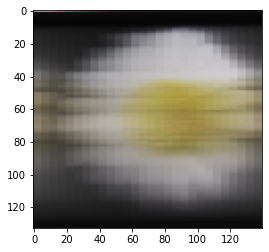

In [1125]:
# Visualize original RGB images
import matplotlib.pyplot as plt
import numpy as np

height = int(np.max(mat_contents['X2'][:,0]))
width = int(np.max(mat_contents['X2'][:,1]))
image = np.zeros((height, width, 3))

for i, each in enumerate(mat_contents['X2']):
    x_loc = int(each[0])
    y_loc = int(each[1])
    for j, chan in enumerate(preds2[i]):
        image[x_loc-1, y_loc-1, j] = int(chan*255)

plt.imshow(image.astype(np.uint8))

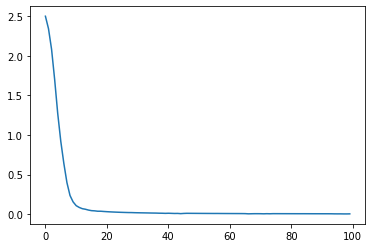

In [1126]:
plt.plot(losses2[0:100])

## Adam Optimizer

In [1129]:
def train_adam(X, y, isRGB, batch_size):
    beta_1 = 0.9
    beta_2 = 0.999
    if isRGB:
        # Initialize weight vector and bias
        w_1 = np.random.rand(2,3) # 2x4
        m_1 = np.zeros((2,3))
        v_1 = np.zeros((2,3))
        b_1 = np.random.rand(3,1)

        w_2 = np.random.rand(3,3) # 4x4
        m_2 = np.zeros((3,3))
        v_2 = np.zeros((3,3))
        b_2 = np.random.rand(3,1)

        w_3 = np.random.rand(3,3) # 4x1
        m_3 = np.zeros((3,3))
        v_3 = np.zeros((3,3))
        b_3 = np.random.rand(3,1)
    else:
        # Initialize weight vector and bias
        w_1 = np.random.rand(2,3) # 2x4
        m_1 = np.zeros((2,3))
        v_1 = np.zeros((2,3))
        b_1 = np.random.rand(3,1)

        w_2 = np.random.rand(3,3) # 4x4
        m_2 = np.zeros((3,3))
        v_2 = np.zeros((3,3))
        b_2 = np.random.rand(3,1)

        w_3 = np.random.rand(3,1) # 4x1
        m_3 = np.zeros((3,1))
        v_3 = np.zeros((3,1))
        b_3 = np.random.rand(1,1)

    # Define the learning rate
    lr = 1
    if isRGB:
        lr = 0.1
    
    preds = []
    losses = []
    num_iter = int(y.shape[1]/batch_size)
    for i in range(num_iter):
        # Create subset
        X_subset = X[:,i*batch_size:i*batch_size+batch_size]
        y_subset = y[:,i*batch_size:i*batch_size+batch_size]

        # Forward pass
        # 1st layer with k=4 (w=2x4, x=7600x2, y=7600x4)
        y_bar_1 = np.dot(w_1.transpose(),X_subset)+b_1
        y_hat_1 = sigmoid(y_bar_1)

        # 2nd layer with k=8 (w=4x8, x=7600x4, y=7600x4)
        y_bar_2 = np.dot(w_2.transpose(),y_hat_1)+b_2
        y_hat_2 = sigmoid(y_bar_2)

        # 3rd layer with k=8 (w=8x1, x=7600x8, y=7600x1)
        y_bar_3 = np.dot(w_3.transpose(),y_hat_2)+b_3
        y_hat_3 = sigmoid(y_bar_3)
        preds.append(np.array(y_hat_3).transpose())
        
        # Calculate loss
        loss = np.power(y_hat_3 - y_subset, 2).sum()/y_subset.shape[1]
        losses.append(loss)
        
        # Back prop
        # Layer 3
        mse = (y_hat_3-y_subset)/y_subset.shape[1] # 1x3
        sigmoid_derivative = (sigmoid(y_bar_3)*(1-sigmoid(y_bar_3))) # 1x3
        gradient = np.multiply(mse, sigmoid_derivative) # 1x3
        d_w3 = np.dot(y_hat_2, gradient.transpose())
        d_b3 = gradient.sum(axis=1, keepdims=True)
        
        # Layer 2
        sigmoid_derivative_2 = sigmoid(y_bar_2)*(1-sigmoid(y_bar_2))
        gradient2 = np.multiply(np.dot(w_3, gradient), sigmoid_derivative_2)
        d_w2 = np.dot(y_hat_1, gradient2.transpose())
        d_b2 = gradient2.sum(axis=1, keepdims=True)

        # Layer 1
        sigmoid_derivative_3 = sigmoid(y_bar_1)*(1-sigmoid(y_bar_1))
        gradient3 = np.multiply(np.dot(w_2, gradient2), sigmoid_derivative_3)
        d_w1 = np.dot(X_subset, gradient3.transpose())
        d_b1 = gradient3.sum(axis=1, keepdims=True)

        # Update weights and biases        
        b_3 -= lr*d_b3
        if isRGB:
            b_3 -= np.multiply(lr,d_b3)
        b_2 -= lr*d_b2
        b_1 -= lr*d_b1
        
        m_3 = beta_1*m_3+(1-beta_1)*d_w3
        m_2 = beta_1*m_2+(1-beta_1)*d_w2
        m_1 = beta_1*m_1+(1-beta_1)*d_w1
        
        v_3 = beta_2*v_3+(1-beta_2)*np.square(d_w3)
        v_2 = beta_2*v_2+(1-beta_2)*np.square(d_w2)
        v_1 = beta_2*v_1+(1-beta_2)*np.square(d_w1)
        
        w_3 -= lr*m_3/(np.sqrt(v_3)+1e-3)
        w_2 -= lr*m_2/(np.sqrt(v_2)+1e-3)
        w_1 -= lr*m_1/(np.sqrt(v_1)+1e-3)
    
    return preds, losses

In [1134]:
preds3, losses3 = train_adam(input_lincoln, output_lincoln, isRGB=False, batch_size=5)
preds3 = np.array(preds3).reshape(7600,1).flatten()

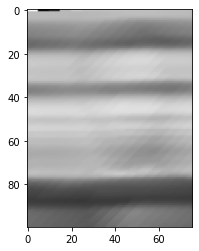

In [1135]:
import matplotlib.pyplot as plt
import numpy as np

height = int(np.max(mat_contents['X1'][:,0]))
width = int(np.max(mat_contents['X1'][:,1]))
image = np.zeros((height, width))

for i, each in enumerate(mat_contents['X1']):
    x_loc = int(each[0])
    y_loc = int(each[1])
    image[x_loc-1, y_loc-1] = preds3.transpose()[i]*255
    
plt.imshow(image, cmap = 'gray')

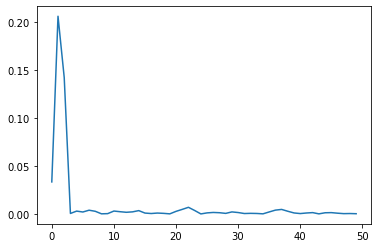

In [1137]:
plt.plot(losses3[0:50])

In [1073]:
preds4, losses4 = train(input_flower, output_flower, isRGB=True, batch_size=5)
preds4 = np.array(preds4).reshape(18620,3)

In [1074]:
preds4*255

array([[229.57527401, 218.65665138, 212.12500496],
       [229.79728498, 218.82823546, 212.36834636],
       [229.94802236, 218.94600438, 212.53636837],
       ...,
       [ 26.80587126,  26.64537475,  27.06893007],
       [ 26.80587126,  26.64537475,  27.06893007],
       [ 26.80587126,  26.64537475,  27.06893007]])

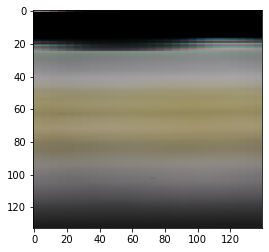

In [1075]:
# Visualize original RGB images
import matplotlib.pyplot as plt
import numpy as np

height = int(np.max(mat_contents['X2'][:,0]))
width = int(np.max(mat_contents['X2'][:,1]))
image = np.zeros((height, width, 3))

for i, each in enumerate(mat_contents['X2']):
    x_loc = int(each[0])
    y_loc = int(each[1])
    for j, chan in enumerate(preds4[i]):
        image[x_loc-1, y_loc-1, j] = int(chan*255)

plt.imshow(image.astype(np.uint8))

## Forward pass

## Sample code

In [448]:
# Define the input
x = input_lincoln/255
x = x.transpose()
print(x.shape)

# Define the ouput
y = output_lincoln / 255
y = y.transpose()

(2, 7600)


In [454]:
batch_size = 10
num_iter = int(y.shape[1]/batch_size)
num_iter
len(np.arange(760))

760

In [441]:
# Initialize weight vector and bias
w_1 = np.random.rand(2,4) # 2x4
b_1 = np.random.rand(4,1)

w_2 = np.random.rand(4,4) # 4x4
b_2 = np.random.rand(4,1)

w_3 = np.random.rand(4,1) # 4x1
b_3 = np.random.rand(1)

In [449]:
# 1st layer with k=4 (w=2x4, x=7600x2, y=7600x4)
y_bar_1 = np.dot(w_1.transpose(),x)+b_1
y_hat_1 = sigmoid(y_bar_1)

# 2nd layer with k=8 (w=4x8, x=7600x4, y=7600x4)
y_bar_2 = np.dot(w_2.transpose(),y_hat_1)+b_2
y_hat_2 = sigmoid(y_bar_2)

# 3rd layer with k=8 (w=8x1, x=7600x8, y=7600x1)
y_bar_3 = np.dot(w_3.transpose(),y_hat_2)+b_3
y_hat_3 = sigmoid(y_bar_3)

# Calculate loss
loss = np.power(y_hat_3 - y, 2).sum()/y.shape[1]

0.13669107329830685


## Backpropagation

In [431]:

# Define the learning rate
lr = 1e-3

# Layer 3
mse = (y_hat_3-y)/y.shape[1] # 1x3
sigmoid_derivative = (sigmoid(y_bar_3)*(1-sigmoid(y_bar_3))) # 1x3
gradient = np.multiply(mse, (sigmoid(y_bar_3)*(1-sigmoid(y_bar_3)))) # 1x3
d_y3 = np.dot(mse, sigmoid_derivative.transpose())
d_w3 = np.dot(y_hat_2, gradient.transpose())
d_b3 = d_y3.flatten()

# Layer 2
sigmoid_derivative_2 = sigmoid(y_bar_2)*(1-sigmoid(y_bar_2))
gradient2 = np.multiply(np.dot(w_3, gradient), sigmoid_derivative_2)
d_w2 = np.dot(y_hat_1, gradient2.transpose())
d_b2 = gradient2.sum(axis=1, keepdims=True)

# Layer 1
sigmoid_derivative_3 = sigmoid(y_bar_1)*(1-sigmoid(y_bar_1))
gradient3 = np.multiply(np.dot(w_2, gradient2), sigmoid_derivative_3)
d_w1 = np.dot(x, gradient3.transpose())
d_b1 = gradient3.sum(axis=1, keepdims=True)

# Update weights and biases
w_3 -= lr*d_w3
w_2 -= lr*d_w2
w_1 -= lr*d_w1

b_3 -= lr*d_b3
b_2 -= lr*d_b2
b_1 -= lr*d_b1

In [432]:
# Define the input
x = input_lincoln/255
x = x.transpose()

# 1st layer with k=4 (w=2x4, x=7600x2, y=7600x4)
y_bar_1 = np.dot(w_1.transpose(),x)+b_1
y_hat_1 = sigmoid(y_bar_1)

# 2nd layer with k=8 (w=4x8, x=7600x4, y=7600x4)
y_bar_2 = np.dot(w_2.transpose(),y_hat_1)+b_2
y_hat_2 = sigmoid(y_bar_2)

# 3rd layer with k=8 (w=8x1, x=7600x8, y=7600x1)
y_bar_3 = np.dot(w_3.transpose(),y_hat_2)+b_3
y_hat_3 = sigmoid(y_bar_3)

# Calculate loss
print(y_hat_3)
print(y_hat_3.shape)

[[0.9049206  0.90493377 0.90494693 ... 0.90645702 0.90646812 0.9064792 ]]
(1, 7600)


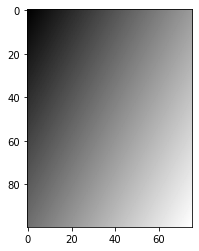

In [433]:
import matplotlib.pyplot as plt
import numpy as np

height = int(np.max(mat_contents['X1'][:,0]))
width = int(np.max(mat_contents['X1'][:,1]))
image = np.zeros((height, width))

for i, each in enumerate(mat_contents['X1']):
    x_loc = int(each[0])
    y_loc = int(each[1])
    image[x_loc-1, y_loc-1] = y_hat_3.transpose()[i]

plt.imshow(image, cmap = 'gray')

## Simple example

In [1092]:
# Define the input
x = input_lincoln/255
x = np.array([[1, 2], [1, 3],[1, 1]]).transpose()
print(x.shape)
# # Initialize weight vector and bias
# w_1 = np.random.rand(2,4) # 2x4
# b_1 = np.random.rand(1)

# w_2 = np.random.rand(4,4) # 4x4
# b_2 = np.random.rand(1)

# w_3 = np.random.rand(4,1) # 4x1
# b_3 = np.random.rand(1)

w_1 = np.array([
            [0.1, 0.2, 0.3],
            [0.4, 0.5, 0.6]
        ]) # 2x3
w_2 = np.array([
            [0.7],
            [0.8],
            [0.9]
        ]) # 3x1

b_1 = np.array([
            [0.1],
            [0.2],
            [0.3]]) # 3x1
b_2 = np.array([[0.5]])

# 1st layer with k=4 (w=2x4, x=7600x2, y=7600x4)
y_bar_1 = np.dot(w_1.transpose(),x)+b_1
y_hat_1 = sigmoid(y_bar_1)
print(y_bar_1.shape)
print(y_hat_1)
# 2nd layer with k=8 (w=4x8, x=7600x4, y=7600x4)
y_bar_2 = np.dot(w_2.transpose(),y_hat_1)+b_2
y_hat_2 = sigmoid(y_bar_2)
print(y_bar_2.shape)
print(y_hat_2)
print(y_bar_2)
# # 3rd layer with k=8 (w=8x1, x=7600x8, y=7600x1)
# y_bar_3 = np.dot(y_hat_2, w_3)+b_3
# y_hat_3 = sigmoid(y_bar_3)
# print(y_hat_3.shape)



(2, 3)
(3, 3)
[[0.73105858 0.80218389 0.64565631]
 [0.80218389 0.86989153 0.7109495 ]
 [0.85814894 0.9168273  0.76852478]]
(1, 3)
[[0.9187753  0.92973243 0.90135675]]
[[2.42582216 2.58258652 2.21239132]]


In [1099]:
# Define the ouput
y = output_lincoln / np.max(output_lincoln)
y = np.array([[149], [144], [138]])/255
y = y.transpose()
# print(y)
# Define the learning rate
lr = 1e-3

# # Layer 3 (y_hat_3=7600x1, y=7600x1, y_bar_3=7600x1, sigmoid=7600x1, y_hat_2=7600x4)
# d_y3 = np.dot((y_hat_3 - y).transpose(), (sigmoid(y_bar_3)*(1-sigmoid(y_bar_3)))).flatten() # 1
# d_w3 = d_y3 * y_hat_2 #7600x4 - has to be 4x1
# d_b3 = d_y3

# # Layer 2 (d_y3=1, w_2=4x4, y_bar_2=7600x4, sigmoid=7600x4)
# d_y2 = np.dot((d_y3*w_2), (sigmoid(y_bar_2)*(1-sigmoid(y_bar_2))).transpose()) # 4x7600
# print(d_y2.shape)
# d_w2 = np.dot(d_y2, y_hat_1)
# d_b2 = d_y2
# print(d_w2.shape)

# Layer 2 (y_hat_3=7600x1, y=7600x1, y_bar_3=7600x1, sigmoid=7600x1, y_hat_2=7600x4)
mse = (y_hat_2-y)/3 # 1x3
# print(mse)
sigmoid_derivative = (sigmoid(y_bar_2)*(1-sigmoid(y_bar_2))) # 1x3
gradient = np.multiply(mse, (sigmoid(y_bar_2)*(1-sigmoid(y_bar_2)))) # 1x3
d_y2 = np.dot(mse, sigmoid_derivative.transpose())
# d_w2 = d_y2 * y_hat_1
d_w2 = np.dot(y_hat_1, gradient.transpose())
d_b2 = d_y2
print("dy2",d_y2)
print("sigmoid derivative",sigmoid_derivative)
# print(gradient)
print("dw2",d_w2)
print("db2",d_b2)
# Layer 1
sigmoid_derivative_2 = sigmoid(y_bar_1)*(1-sigmoid(y_bar_1))
gradient2 = np.multiply(np.dot(w_2, gradient), sigmoid_derivative_2)
d_w1 = np.dot(x, gradient2.transpose())
d_b1 = gradient2.transpose().sum(axis=1, keepdims=True)
print("dw1",d_w1)
print("db1",d_b1)
# Update weights and biases
w_2 -= lr*d_w2
w_1 -= lr*d_w1
# w_3 -= lr*d_w3

b_2 -= lr*d_b2
b_1 -= lr*d_b1
# b_3 -= lr*d_b_3

dy2 [[0.02694392]]
sigmoid derivative [[0.07462725 0.06533003 0.08891276]]
dw2 [[0.01935131]
 [0.02117828]
 [0.02263161]]
db2 [[0.02694392]]
dw1 [[0.00373699 0.00353034 0.00316567]
 [0.00664753 0.00602563 0.00516796]]
db1 [[0.00311228]
 [0.00214792]
 [0.0051728 ]]
